**Atualizando a biblioteca para plotagem de gráficos**


In [161]:
!pip -q install plotly --upgrade

**Importando bibliotecas**

In [162]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
import pickle

**Abrindo um arquivo CSV do drive**

In [163]:
base = pd.read_csv('/content/sample_data/weather.csv', ';')

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


**Você também pode carregar seu arquivo e já selecionar as colunas que desejar... investigue esta função**

In [ ]:
#base2 = pd.read_csv('/content/sample_data/restaurante.csv', ';', usecols=['Alternativo', 'Bar'])
#base2

In [176]:
base

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cold,normal,False,yes
5,rainy,cold,normal,True,no
6,overcast,cold,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cold,normal,False,yes
9,rainy,mild,normal,False,yes


In [ ]:
#base.head(3)

In [ ]:
#base.tail(2)

**Contando quantidade de instâncias**


In [177]:
np.unique(base['play'], return_counts=True)

(array(['no', 'yes'], dtype=object), array([5, 9]))

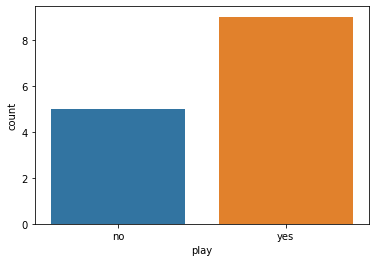

In [178]:
sns.countplot(x = base['play']);

**Separando os atributos de entrada e de classe**

In [179]:
X_prev = base.iloc[:, 0:4].values

In [180]:
X_prev

array([['sunny', 'hot', 'high', False],
       ['sunny', 'hot', 'high', True],
       ['overcast', 'hot', 'high', False],
       ['rainy', 'mild', 'high', False],
       ['rainy', 'cold', 'normal', False],
       ['rainy', 'cold', 'normal', True],
       ['overcast', 'cold', 'normal', True],
       ['sunny', 'mild', 'high', False],
       ['sunny', 'cold', 'normal', False],
       ['rainy', 'mild', 'normal', False],
       ['sunny', 'mild', 'normal', True],
       ['overcast', 'mild', 'high', True],
       ['overcast', 'hot', 'normal', False],
       ['rainy', 'mild', 'high', True]], dtype=object)

In [181]:
X_prev_label = base.iloc[:, 0:4]

In [182]:
X_prev_label

,outlook,temperature,humidity,windy
0,sunny,hot,high,False
1,sunny,hot,high,True
2,overcast,hot,high,False
3,rainy,mild,high,False
4,rainy,cold,normal,False
5,rainy,cold,normal,True
6,overcast,cold,normal,True
7,sunny,mild,high,False
8,sunny,cold,normal,False
9,rainy,mild,normal,False


In [183]:
X_prev[:,2]

array(['high', 'high', 'high', 'high', 'normal', 'normal', 'normal',
       'high', 'normal', 'normal', 'normal', 'high', 'normal', 'high'],
      dtype=object)

In [184]:
y_classe = base.iloc[:, 4].values

In [185]:
y_classe

array(['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes',
       'yes', 'yes', 'yes', 'no'], dtype=object)

**Podemos fazer esta mesma divisão (separar as variáveis de entrada e saída) usando os comandos abaixo**

In [ ]:
#X = base.copy() 
#y = X.pop('Conclusao')

**Tratamento de dados categóricos**

> *LabelEncoder - Vamos tratar os dados categóricos colocando 1, 2, 3 e etc**



In [186]:
from sklearn.preprocessing import LabelEncoder

In [187]:
label_encoder = LabelEncoder()

In [188]:
X_prev[:,0]

array(['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy',
       'overcast', 'sunny', 'sunny', 'rainy', 'sunny', 'overcast',
       'overcast', 'rainy'], dtype=object)

In [189]:
X_prev

array([['sunny', 'hot', 'high', False],
       ['sunny', 'hot', 'high', True],
       ['overcast', 'hot', 'high', False],
       ['rainy', 'mild', 'high', False],
       ['rainy', 'cold', 'normal', False],
       ['rainy', 'cold', 'normal', True],
       ['overcast', 'cold', 'normal', True],
       ['sunny', 'mild', 'high', False],
       ['sunny', 'cold', 'normal', False],
       ['rainy', 'mild', 'normal', False],
       ['sunny', 'mild', 'normal', True],
       ['overcast', 'mild', 'high', True],
       ['overcast', 'hot', 'normal', False],
       ['rainy', 'mild', 'high', True]], dtype=object)

In [190]:
label_encoder_humidity = LabelEncoder()
label_encoder_windy = LabelEncoder()

In [191]:
X_prev[:,2] = label_encoder_humidity.fit_transform(X_prev[:,2])
X_prev[:,3] = label_encoder_windy.fit_transform(X_prev[:,3])


In [192]:
X_prev

array([['sunny', 'hot', 0, 0],
       ['sunny', 'hot', 0, 1],
       ['overcast', 'hot', 0, 0],
       ['rainy', 'mild', 0, 0],
       ['rainy', 'cold', 1, 0],
       ['rainy', 'cold', 1, 1],
       ['overcast', 'cold', 1, 1],
       ['sunny', 'mild', 0, 0],
       ['sunny', 'cold', 1, 0],
       ['rainy', 'mild', 1, 0],
       ['sunny', 'mild', 1, 1],
       ['overcast', 'mild', 0, 1],
       ['overcast', 'hot', 1, 0],
       ['rainy', 'mild', 0, 1]], dtype=object)



> OneHotEncoder - Agora vamos binarizar atributos não ordinais

**Contando quantas opções de resposta tem cada atributo**

In [ ]:
#len(np.unique(base['Cliente'])) 

In [193]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [194]:
X_prev

array([['sunny', 'hot', 0, 0],
       ['sunny', 'hot', 0, 1],
       ['overcast', 'hot', 0, 0],
       ['rainy', 'mild', 0, 0],
       ['rainy', 'cold', 1, 0],
       ['rainy', 'cold', 1, 1],
       ['overcast', 'cold', 1, 1],
       ['sunny', 'mild', 0, 0],
       ['sunny', 'cold', 1, 0],
       ['rainy', 'mild', 1, 0],
       ['sunny', 'mild', 1, 1],
       ['overcast', 'mild', 0, 1],
       ['overcast', 'hot', 1, 0],
       ['rainy', 'mild', 0, 1]], dtype=object)

In [195]:
X_prev[:,0:5]

array([['sunny', 'hot', 0, 0],
       ['sunny', 'hot', 0, 1],
       ['overcast', 'hot', 0, 0],
       ['rainy', 'mild', 0, 0],
       ['rainy', 'cold', 1, 0],
       ['rainy', 'cold', 1, 1],
       ['overcast', 'cold', 1, 1],
       ['sunny', 'mild', 0, 0],
       ['sunny', 'cold', 1, 0],
       ['rainy', 'mild', 1, 0],
       ['sunny', 'mild', 1, 1],
       ['overcast', 'mild', 0, 1],
       ['overcast', 'hot', 1, 0],
       ['rainy', 'mild', 0, 1]], dtype=object)

In [196]:
onehotencoder_restaurante = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [0,1])], remainder='passthrough')


In [197]:
X_prev= onehotencoder_restaurante.fit_transform(X_prev)

In [198]:
X_prev

array([[0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0, 0],
       [0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0, 1],
       [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0, 0],
       [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0, 0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1, 0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1, 1],
       [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1, 1],
       [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0, 0],
       [0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1, 0],
       [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1, 0],
       [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1, 1],
       [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0, 1],
       [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1, 0],
       [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0, 1]], dtype=object)

In [199]:
X_prev.shape

(14, 8)

**Esta mesma transformação OneHotEncoder pode ser feita com o comando abaixo**

In [ ]:
#base = pd.get_dummies(X_prev_label)
#base.head()

**Método de amostragem Holdout**

In [200]:
from sklearn.model_selection import train_test_split

In [201]:
X_prev

array([[0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0, 0],
       [0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0, 1],
       [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0, 0],
       [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0, 0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1, 0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1, 1],
       [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1, 1],
       [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0, 0],
       [0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1, 0],
       [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1, 0],
       [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1, 1],
       [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0, 1],
       [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1, 0],
       [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0, 1]], dtype=object)

In [202]:
y_classe

array(['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes',
       'yes', 'yes', 'yes', 'no'], dtype=object)

In [203]:
y_classe.shape

(14,)

In [204]:
X_teste = base.loc[5]
X_teste

outlook         rainy
temperature      cold
humidity       normal
windy            True
play               no
Name: 5, dtype: object

In [205]:
y_teste = X_teste['play']
X_teste.drop(['play'], inplace=True)

/usr/local/lib/python3.9/dist-packages/pandas/core/generic.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(obj)


In [206]:
X_teste

outlook         rainy
temperature      cold
humidity       normal
windy            True
Name: 5, dtype: object

In [207]:
#X_train_ds, X_test_ds, y_train_ds, y_test_ds = train_test_split(X, y, test_size=0.3, random_state=123, shuffle=True, stratify=y)
X_treino, X_teste, y_treino, y_teste = train_test_split(X_prev, y_classe, test_size = 0.07, random_state = 0)

In [ ]:
X_treino.shape

In [210]:
X_teste.shape

(1, 8)

In [211]:
X_teste

array([[0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1, 0]], dtype=object)

In [212]:
y_treino

array(['yes', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'yes',
       'no', 'no', 'yes'], dtype=object)

In [213]:
y_teste

array(['yes'], dtype=object)

In [ ]:
#import pickle

In [214]:
with open('/content/sample_data/weather.pkl', mode = 'wb') as f:
  pickle.dump([X_treino, X_teste, y_treino, y_teste], f)